In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Diversity of phase transitions and phase separations in active fluids

The hydrodynamic equations in one dimension
$$
\begin{aligned}
\partial_t \rho + \partial_x p &= \eta \partial_x^2 \rho, \\
\partial_t p + \lambda p \partial_x p &= \mu \partial_x^2 p - \kappa(\rho) \partial_x \rho + \alpha(\rho) p - \beta p^3.
\end{aligned}
$$

Expanding about a homogeneous ordered solution $(\rho=\rho_0, p=p_0)$, where $p_0=\sqrt{\alpha_0/\beta}$, we get
$$
\begin{aligned}
\partial_t \delta \rho &= -\partial_x \delta p + \eta \partial_x^2 \delta \rho, \\
\partial_t \delta p &= (\mu\partial_x^2 - \lambda p_0 \partial_x - 2 \alpha_0) \delta p + (\alpha_1 p_0 - \kappa_0 \partial_x) \delta \rho
\end{aligned}
$$

The corresponding determined matrix reads
$$
M=\begin{pmatrix}
-q^2 \eta & -iq\\
-iq\kappa + \alpha_1 p_0 & -q^2 \mu - iq \lambda p_0 - 2\alpha_0
\end{pmatrix}
$$

Neglecting $\eta$ and $\mu$ terms, the growth rate $\sigma$ obeys
$$
\sigma^2 + (iq\lambda p_0 + 2\alpha_0)\sigma + q^2 \kappa + iq\alpha_1 p_0 = 0,
$$
The condition for the instability is
$$
(\lambda \alpha_0 - \alpha_1)^2 > \lambda^2 \alpha_0^2 + 4\kappa \alpha_0^2/p_0^2 = \lambda^2 \alpha_0^2 + 4\kappa \alpha_0\beta,
$$
i.e.,
$$
\alpha_1 > \lambda \alpha_0 + \sqrt{\lambda^2 \alpha_0^2 + 4\kappa \alpha_0 \beta}
$$
or
$$
\alpha_1 < \lambda \alpha_0 - \sqrt{\lambda^2 \alpha_0^2 + 4\kappa \alpha_0 \beta}
$$

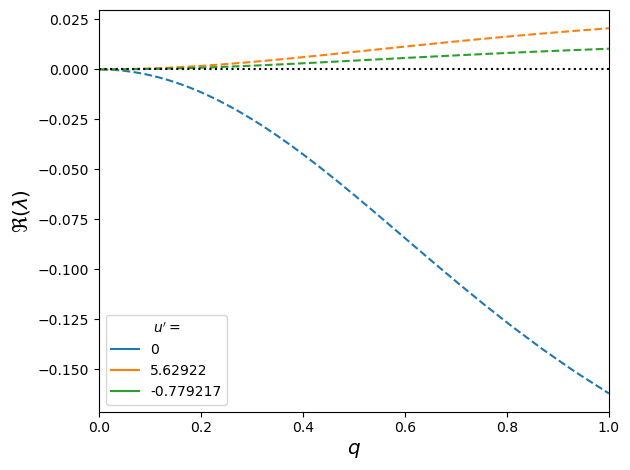

In [2]:
def get_sigma(q, alpha_0, alpha_1, kappa, lamb, p0=1):
    b = 1j * q * lamb * p0 + 2 * alpha_0
    c = q**2 * kappa + 1j * q * alpha_1 * p0
    return 0.5 * (-b + np.sqrt(b**2 - 4 * c))

kappa = 0.7
lamb = 2
alpha_0 = 1.2
p0=1

q_arr = np.logspace(-3, 0, 100)

tmp = np.sqrt(lamb ** 2 * alpha_0 ** 2 + 4 * kappa * alpha_0 ** 2 / p0 ** 2)
a_max = tmp + lamb * alpha_0
a_min = -tmp + lamb * alpha_0

for alpha_1 in [0, a_max+0.1, a_min-0.05]:
    sigma = get_sigma(q_arr, alpha_0, alpha_1, kappa, lamb, p0)
    mask = np.abs(sigma.imag) < 1e-8
    line, = plt.plot(q_arr[mask], sigma[mask].real, label="%g" % alpha_1)
    mask = np.abs(sigma.imag) >= 1e-8
    plt.plot(q_arr[mask], sigma[mask].real, "--", c=line.get_c())
plt.axhline(0, c="k", linestyle="dotted")
plt.legend(title=r"$u'=$")
plt.xlim(0, 1)
plt.xlabel(r"$q$", fontsize='x-large')
plt.ylabel(r"$\Re(\lambda)$", fontsize="x-large")
plt.tight_layout()
plt.show()
plt.close()

Assuming $\beta$ also depends on $\rho$, which leads to the linearized equations
$$
\begin{aligned}
\partial_t \delta \rho &= -\partial_x \delta p + \eta \partial_x^2 \delta \rho, \\
\partial_t \delta p &= (\mu\partial_x^2 - \lambda p_0 \partial_x - 2 \alpha_0) \delta p + ((\alpha_1-\beta_1 p_0^2)  p_0 - \kappa_0 \partial_x) \delta \rho
\end{aligned}
$$
The condition for the instability becomes
$$
\alpha_1 -\beta_1 \alpha_0 / \beta_0> \lambda \alpha_0 + \sqrt{\lambda^2 \alpha_0^2 + 4\kappa \alpha_0 \beta_0}
$$

Assuming $\alpha(\rho)=\rho - \rho_c$, $\beta(\rho)=1/\rho$, such that $p_0/\rho_0 = \sqrt{1-\frac{\rho_c}{\rho_0}}$ goes to $1$ as $\rho_0 \to \infty$.
Then $\alpha_1 = 1$, $\alpha_0 = \rho_0 - \rho_c$, $\beta_1=-1/\rho_0^2$, $\beta_0=1/\rho_0$. 

In [3]:
def func_kappa(rho):
    return 140 - 145 * rho + 30 * rho**2

def func_alpha(rho, A):
    return -A + 18 * rho - 10 / 3 * rho**2

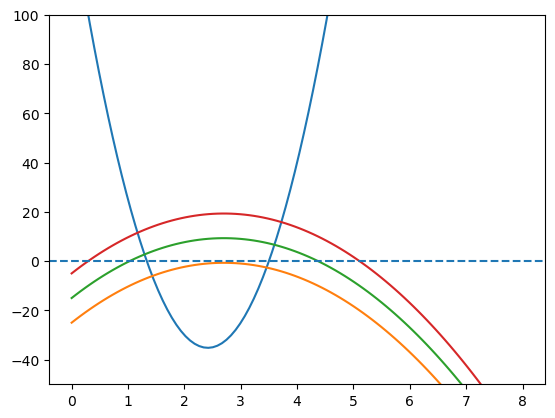

In [4]:
rho_arr = np.linspace(0, 8, 100)

kappa_arr = func_kappa(rho_arr)

A = 5

plt.plot(rho_arr, kappa_arr)

alpha_arr = func_alpha(rho_arr, 25)
plt.plot(rho_arr, alpha_arr)

alpha_arr = func_alpha(rho_arr, 15)
plt.plot(rho_arr, alpha_arr)

alpha_arr = func_alpha(rho_arr, 5)
plt.plot(rho_arr, alpha_arr)

plt.ylim(-50, 100)
plt.axhline(0, linestyle="dashed")
plt.show()
plt.close()

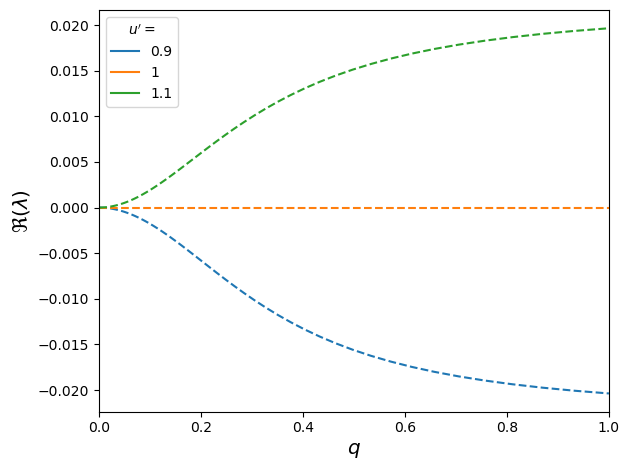

In [5]:
def get_lambda(q_arr, u_prime, gamma, D, u0=1, rho0=1):
    b = 1j * q_arr * u0 + gamma
    c = 1j * q_arr * gamma * (u0 + rho0 * u_prime) + q_arr ** 2 * (rho0 * u0  * u_prime + gamma * D)
    Delta = b**2 - 4 * c
    res = (-b + np.sqrt(Delta))/2
    return res


gamma = 1
D = 1
u_prime = 1.1
u0 =1
rho0 = 1

q_arr = np.logspace(-3, 0, 100)

for u_prime in [0.9, 1.0, 1.1]:
    sigma = get_lambda(q_arr, u_prime, gamma, D, u0, rho0)
    mask = np.abs(sigma.imag) < 1e-8
    line, = plt.plot(q_arr[mask], sigma[mask].real, label="%g" % u_prime)
    mask = np.abs(sigma.imag) >= 1e-8
    plt.plot(q_arr[mask], sigma[mask].real, "--", c=line.get_c())
plt.legend(title=r"$u'=$")
plt.xlim(0, 1)
plt.xlabel(r"$q$", fontsize='x-large')
plt.ylabel(r"$\Re(\lambda)$", fontsize="x-large")
plt.tight_layout()
plt.show()
plt.close()

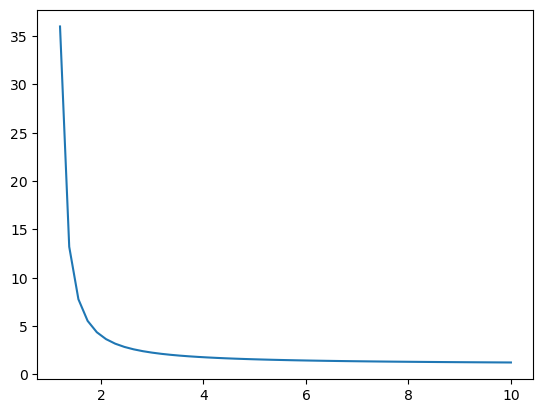

In [6]:
x = np.linspace(1.2, 10)
plt.plot(x, x**2 / (x-1)**2)
plt.show()
plt.close()

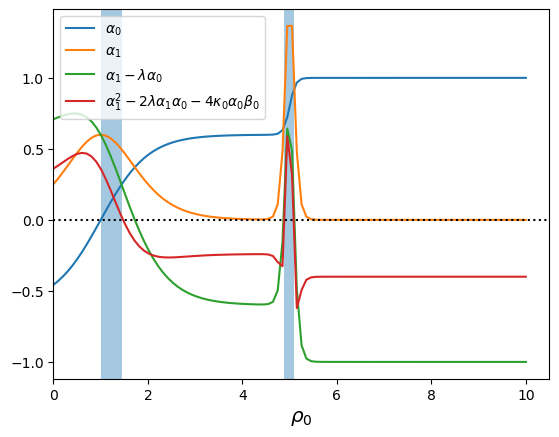

In [51]:
def func_alpha(rho, phi_g=1, rho_1=4, A=0.5, eta=5):
    return (1-A) * np.tanh(rho - phi_g) + 0.5 * A * (1 + np.tanh(eta * (rho - rho_1)))

def func_alpha_prime(rho, phi_g=1, rho_1=4, A=0.5, eta=5):
    return (1-A) * (1- np.tanh(rho-phi_g)**2) + 0.5 * A * eta * (1 - np.tanh(eta * (rho - rho_1)) ** 2)

lamb = 0.5
beta0 = 1
kappa = 0.1

A = 0.4
eta = 8
phi_g = 1
rho_1 = 5

rho = np.linspace(0, 10, 100)

alpha = func_alpha(rho, phi_g, rho_1, A, eta)
alpha_prime = func_alpha_prime(rho, phi_g, rho_1, A, eta)

f = alpha_prime**2 - 2 * lamb * alpha_prime * alpha - 4 * kappa * beta0 * alpha

plt.plot(rho, alpha, label=r"$\alpha_0$")
plt.plot(rho, alpha_prime, label=r"$\alpha_1$")

plt.plot(rho, alpha_prime - alpha, label=r"$\alpha_1-\lambda \alpha_0$")
plt.plot(rho, f, label=r"$\alpha^2_1 - 2\lambda \alpha_1 \alpha_0 - 4 \kappa_0 \alpha_0\beta_0$")

plt.axvspan(1, 1.45, alpha=0.4)
plt.axvspan(4.88, 5.1, alpha=0.4)


plt.axhline(0, c="k", linestyle=":")
plt.xlabel(r"$\rho_0$", fontsize="x-large")
plt.xlim(0)
plt.legend()
plt.show()
plt.close()